In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy import linalg
import itertools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
def dataset_gen():
    """Generate 2 Gaussians samples with different covariance matrices"""
    # Define size and dimension. 
    n, dim = 600, 2
    # Set mean vector for class 0. 
    m_0 = np.array([0, 0]).reshape(2, 1)
    # Set mean vector for class 1.
    m_1 = np.array([9, 8]).reshape(2, 1)
    # Set covariance matrix for class 0. 
    C_0 = np.array([[6, 4],
                    [4, 9]])
    # Set covariance matrix for class 1. 
    C_1 = np.array([[8, -3],
                    [-3, 4]])
    # Generate multivariate_normal for class 0.
    X_0 = np.random.multivariate_normal(mean=m_0.reshape(dim,), cov=C_0, size=n//2)
    # Generate multivariate_normal for class 1.
    X_1 = np.random.multivariate_normal(mean=m_1.reshape(dim,), cov=C_1, size=n//2)
    # Join both classes 
    X = np.concatenate((X_0, X_1), axis=0)
    # Generate appropriate class labels
    # hstack and concatenate do the same thing for this senario
    y = np.hstack((np.zeros(n//2), np.ones(n//2)))
    return X, y


Mean accuracy on the given test data 0.985


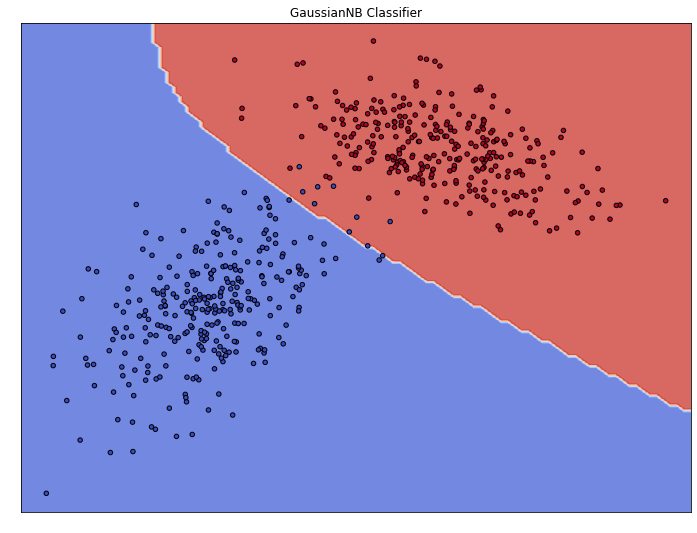

In [3]:

# Take the two generated features. 
X,y = dataset_gen()
# we create an instance of GaussianNB and fit out data. We do not scale our
gnb = GaussianNB()
# data since we want to plot the support vectors
models_fit = gnb.fit(X, y) 
# title for the plots
title = ("GaussianNB Classifier")
#Classifier score
print("Mean accuracy on the given test data",gnb.score(X, y))
# Set-upgrid for plotting.
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
X0, X1 = X[:, 0], X[:, 1]


disp = DecisionBoundaryDisplay.from_estimator(gnb,X,response_method="predict",cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=" ",
        ylabel=" ",
)

ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

plt.show()

In [4]:
print("Variance : \n\n",gnb.var_)
print("\nMeans : \n\n",gnb.theta_)

Variance : 

 [[6.00940911 8.71584129]
 [8.3143887  3.79095053]]

Means : 

 [[-0.22608418 -0.5250554 ]
 [ 9.02792217  7.90349803]]


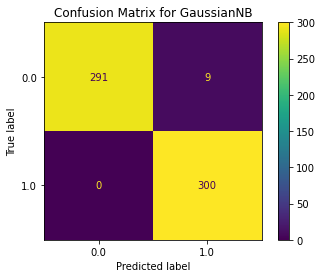

In [5]:
cm = confusion_matrix(y, models_fit.predict(X), labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gnb.classes_)
disp.plot()
plt.title("Confusion Matrix for GaussianNB")
plt.show()